In [1]:
import os 
import pathlib 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator


# ./Belt
# ./Coat
# ./Gloves
# ./Jacket
# ./Leggings
# ./Shirt
# ./shoes
# ./Socks
# ./Trousers
# ./Vest top

# Define directory paths
train_dir = "./images/train/"
test_dir = "./images/test/"

batch = 25
epoch = 10


train_datagen_augmented  = ImageDataGenerator(rescale=1/255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
train_datagen  = ImageDataGenerator(rescale=1/255)
test_datagen  = ImageDataGenerator(rescale=1/255)

print("Augmented training data")
train_data_augmented= train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size = (240,240),
                                                                  batch_size = batch,
                                                                  class_mode = "categorical",
                                                                  shuffle=False)

#Create non augmented train data batches
print("Non augmented training data")
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= batch,
                                               target_size= (240,240),
                                               class_mode = "categorical",
                                               shuffle = False)

#Create non aumented test data batches
print("Non augmented test data")
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               batch_size= batch,
                                               target_size= (240,240),
                                               class_mode = "categorical")



Augmented training data
Found 750 images belonging to 10 classes.
Non augmented training data
Found 750 images belonging to 10 classes.
Non augmented test data
Found 250 images belonging to 10 classes.


25


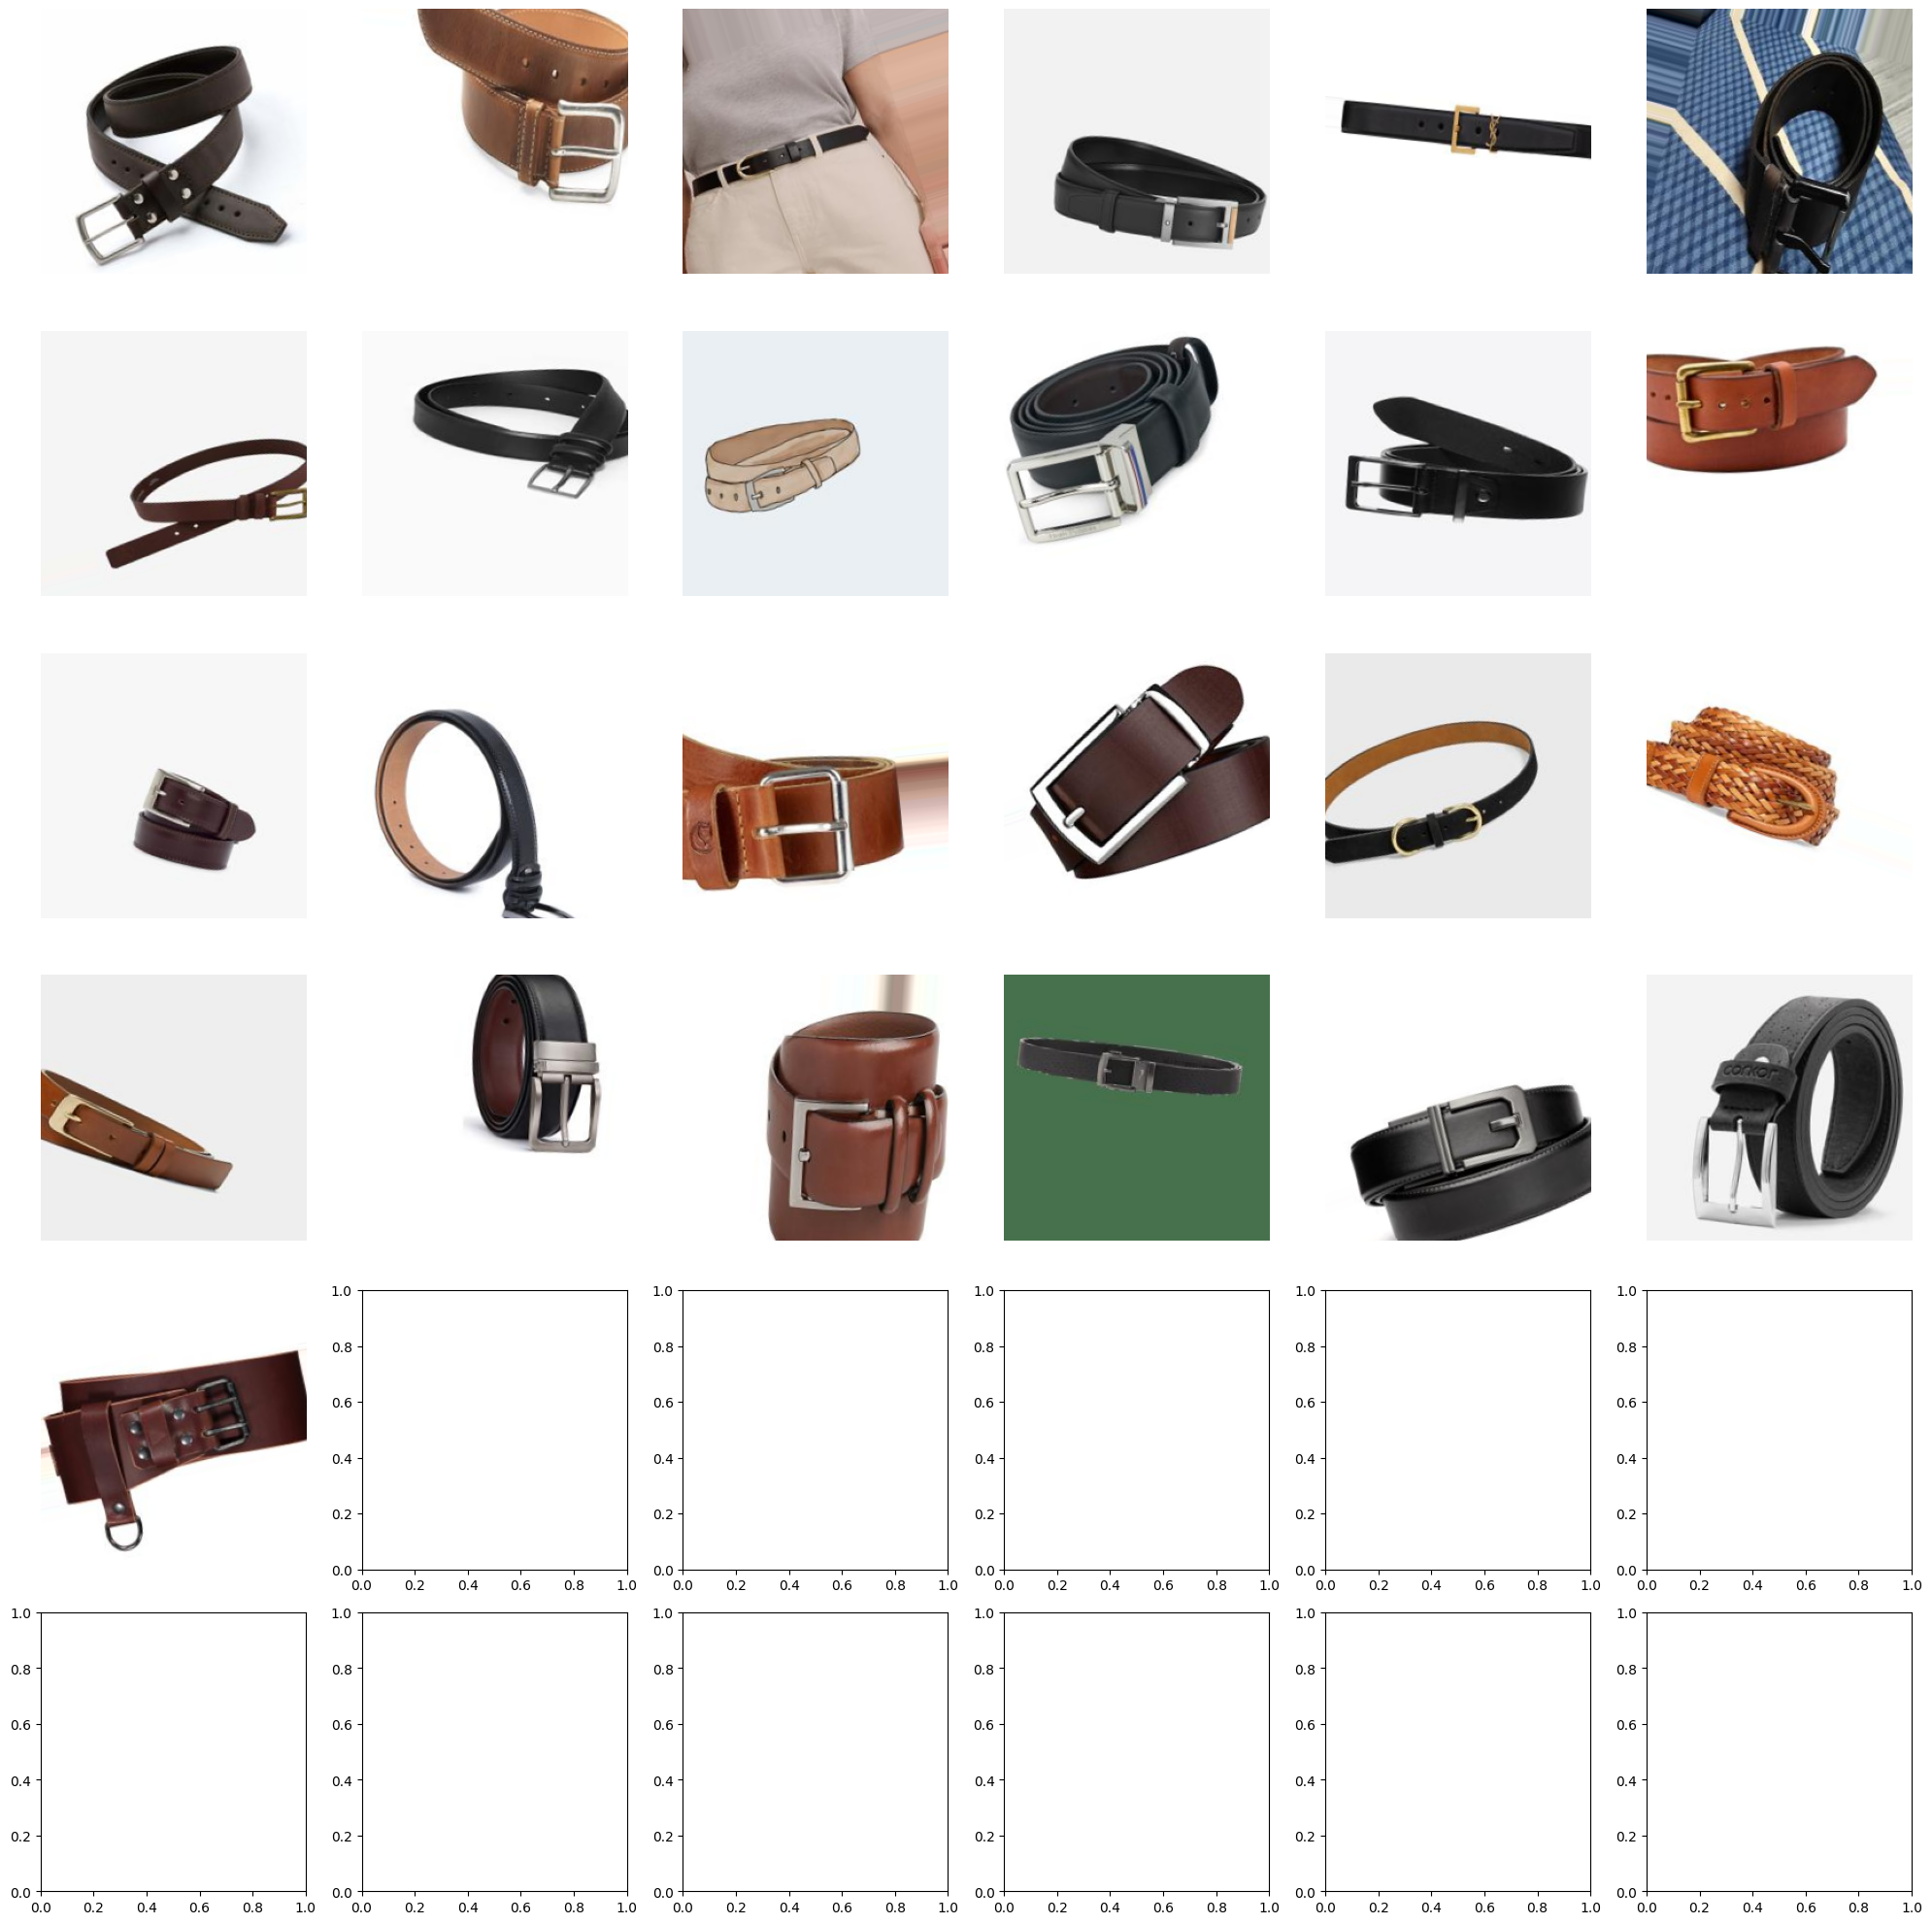

In [2]:
print(train_data)
images, labels = train_data.next()
augmented_images, augmented_labels =train_data_augmented.next()
print(len(images))
# print(images)

def plotImages(images_arr):
    fig, axes = plt.subplots(6, 6, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
plotImages(augmented_images[:36])




In [3]:

# Let's shuffle the augmented images
print("Shuffled Augmented training data")
train_data_augmented_shuffled= train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size = (240,240),
                                                                  batch_size = batch,
                                                                  class_mode = "categorical",
                                                                  shuffle=True)

shuffled_augmented_images, shuffled_augmented_labels =train_data_augmented.next()


# Lets see an original image and a shuffled&augmented image randomly
# import random
# random_number = random.randint(0,31)
# print(f" Showing image num: {random_number}")
# plt.figure()
# plt.subplot(1,2,1)
# plt.imshow(images[random_number])
# plt.title("Original Image")
# plt.axis(False)
# plt.subplot(1,2,2)
# plt.imshow(shuffled_augmented_images[random_number])
# plt.title("Shuffled&Augmented Image")
# plt.axis(False)
# plt.show()


Shuffled Augmented training data
Found 750 images belonging to 10 classes.


In [22]:
# Create the model

# 시도1

# Create the base model from the pre-trained model ResNet50 V2

# base_model = tf.keras.applications.ResNet50V2(include_top= False,)
# base_model.trainable = False
# inputs = tf.keras.layers.Input(shape =(240,240,3), name = "input-layer")
# inputs = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)   # 
# x = base_model(inputs)
# print(f"Shape after passing inputs through base model: {x.shape}")
# x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
# print(f"Shape after GlobalAveragePooling2D: {x.shape}")
# # x = tf.keras.layers.Flatten()(x)
# outputs = tf.keras.layers.Dense(10, activation = "softmax", name = "output-layer")(x)
# model = tf.keras.Model(inputs, outputs)

base_model = tf.keras.applications.ResNet50V2(input_shape=(240,240, 3),
                                               include_top=False)
base_model.trainable = False

model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [19]:
# 시도2

# Create the model standard

# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu',
#                            input_shape=(240,240, 3)),
#     tf.keras.layers.MaxPooling2D((2, 2), strides=2),
#     tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D((2, 2), strides=2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(10,  activation='softmax')
# ])


In [11]:
# 시도3

# Create the base model from the pre-trained model MobileNet V2

# base_model = tf.keras.applications.MobileNetV2(input_shape=(240,240, 3),
#                                                include_top=False,
#                                                weights='imagenet')
# base_model.trainable = False

# model = tf.keras.Sequential([
#   base_model,
#   tf.keras.layers.GlobalAveragePooling2D(),
#   tf.keras.layers.Dense(10, activation='softmax')
# ])

In [23]:
# # Compile the model
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 8, 8, 2048)        23564800  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________
None


In [24]:
history = model.fit(train_data_augmented_shuffled,
                                 epochs=epoch,
                                 validation_data = test_data)  # steps_per_epoch = len(train_data), validation_steps = int(0.25*len(test_data)),

model.evaluate(test_data)

Epoch 1/10
30/30 [==============================] - 53s 2s/step - loss: 1.6069 - accuracy: 0.4840 - val_loss: 0.9174 - val_accuracy: 0.7240
Epoch 2/10
30/30 [==============================] - 55s 2s/step - loss: 0.5906 - accuracy: 0.8520 - val_loss: 0.6499 - val_accuracy: 0.7920
Epoch 3/10
30/30 [==============================] - 57s 2s/step - loss: 0.4199 - accuracy: 0.8880 - val_loss: 0.5511 - val_accuracy: 0.8080
Epoch 4/10
30/30 [==============================] - 56s 2s/step - loss: 0.3317 - accuracy: 0.9187 - val_loss: 0.5193 - val_accuracy: 0.8120
Epoch 5/10
30/30 [==============================] - 59s 2s/step - loss: 0.2732 - accuracy: 0.9293 - val_loss: 0.4674 - val_accuracy: 0.8240
Epoch 6/10
30/30 [==============================] - 59s 2s/step - loss: 0.2378 - accuracy: 0.9427 - val_loss: 0.4635 - val_accuracy: 0.8320
Epoch 7/10
30/30 [==============================] - 59s 2s/step - loss: 0.2026 - accuracy: 0.9493 - val_loss: 0.4413 - val_accuracy: 0.8400
Epoch 8/10
30/30 [==

[0.3934811055660248, 0.8640000224113464]

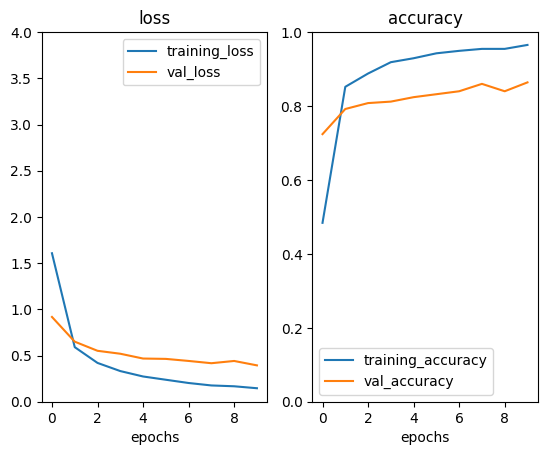

In [25]:
def plot_loss_curves(history):

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    #plot loss
    plt.figure()
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label = "training_loss")
    plt.plot(epochs, val_loss, label = "val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.ylim(0, 4)
    plt.legend()

    #plot accuracy
    plt.subplot(1,2,2)
    plt.plot(epochs, accuracy, label = "training_accuracy")
    plt.plot(epochs, val_accuracy, label = "val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.ylim(0, 1)
    plt.legend()
    plt.show()

plot_loss_curves(history)

In [26]:
# # 모델 저장
model.save('my_model')

INFO:tensorflow:Assets written to: my_model\assets


INFO:tensorflow:Assets written to: my_model\assets


In [16]:
print('aa')

aa


In [9]:
# base_model.trainable = True # 미리 학습된 가중치를 동결하지 않음

# # Un-freeze last 10 layers
# print(f'base_model.layers : {len(base_model.layers)} layers')
# for layer in base_model.layers[:-10]:
#   layer.trainable = False   # # 미리 학습된 가중치를 10개 레이어만 동결함

# # Recompile (we have to compile model every time there is a change)
# model.compile(loss = "categorical_crossentropy",
#                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), # when fine-tuning you typically want to lower lr by 10x
#                  metrics = ["accuracy"] )

# model.summary()

base_model.layers : 190 layers
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, None, None, 2048)  23564800  
                                                                 
 global_average_pooling_laye  (None, 2048)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output-layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 3,436,554
Non-trainable params: 20,148,736
_________________________________________________________________


In [11]:
# Now we have unfrozen some of the layers on the top 

# print(len(model.trainable_variables))

11


In [12]:
# history_2 = model.fit(train_data_augmented_shuffled,
#                                  epochs=epoch,
#                                  validation_data = test_data)  # steps_per_epoch = len(train_data), validation_steps = int(0.25*len(test_data)),

# model.evaluate(test_data)

Epoch 1/10
750/750 [==============================] - 87s 113ms/step - loss: 0.8229 - accuracy: 0.7707 - val_loss: 0.5581 - val_accuracy: 0.8720
Epoch 2/10
750/750 [==============================] - 90s 120ms/step - loss: 0.3610 - accuracy: 0.9200 - val_loss: 0.8841 - val_accuracy: 0.8280
Epoch 3/10
750/750 [==============================] - 94s 126ms/step - loss: 0.2950 - accuracy: 0.9173 - val_loss: 0.7338 - val_accuracy: 0.8520
Epoch 4/10
750/750 [==============================] - 91s 122ms/step - loss: 0.2045 - accuracy: 0.9467 - val_loss: 1.0814 - val_accuracy: 0.8280
Epoch 5/10
750/750 [==============================] - 96s 128ms/step - loss: 0.1912 - accuracy: 0.9400 - val_loss: 0.7877 - val_accuracy: 0.8560
Epoch 6/10
750/750 [==============================] - 106s 141ms/step - loss: 0.1379 - accuracy: 0.9667 - val_loss: 0.7494 - val_accuracy: 0.8720
Epoch 7/10
750/750 [==============================] - 95s 127ms/step - loss: 0.1456 - accuracy: 0.9560 - val_loss: 0.8565 - val_a

[1.3865853548049927, 0.8159999847412109]

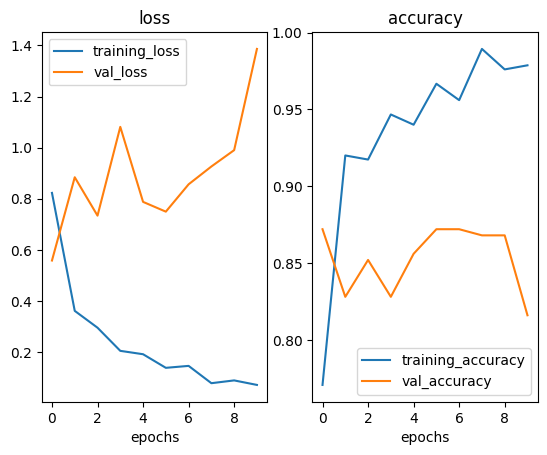

In [13]:
# plot_loss_curves(history_2)

In [17]:
probabilities = model.predict(test_data)
print(test_data)
print(test_data.class_indices)
print(probabilities[:5])

10/10 [==============================] - 7s 556ms/step
{'Belt': 0, 'Coat': 1, 'Gloves': 2, 'Jacket': 3, 'Leggings': 4, 'Shirt': 5, 'Socks': 6, 'Trousers': 7, 'Vest top': 8, 'shoes': 9}
[[2.0019165e-03 4.5570009e-04 2.1881887e-03 3.5160039e-02 9.8157730e-03
  9.2189914e-01 1.6918223e-03 2.4114478e-02 2.1976456e-03 4.7525973e-04]
 [2.4609134e-04 5.9534574e-04 4.4208770e-03 7.4573309e-04 2.6685018e-03
  3.0905238e-04 3.9994906e-04 9.8944646e-01 4.3696698e-04 7.3095440e-04]
 [9.7276534e-06 5.1425604e-06 1.0452091e-03 2.2054942e-06 2.3707260e-04
  3.8665194e-06 9.9734277e-01 2.3058878e-05 2.9908196e-04 1.0319387e-03]
 [5.6884613e-02 2.0458648e-02 6.1438078e-01 4.1797716e-02 1.8595062e-02
  6.2923104e-02 5.4517463e-03 2.3339277e-03 1.6111700e-01 1.6057488e-02]
 [1.3312909e-03 6.8051805e-04 1.2481335e-03 6.8351356e-03 6.7418366e-04
  9.7673595e-01 2.2100603e-04 1.7720617e-03 1.0355061e-02 1.4665283e-04]]


Found 250 images belonging to 10 classes.
{'Belt': 0, 'Coat': 1, 'Gloves': 2, 'Jacket': 3, 'Leggings': 4, 'Shirt': 5, 'Socks': 6, 'Trousers': 7, 'Vest top': 8, 'shoes': 9}
1/1 [==============================] - 1s 1s/step
예측 결과 출력 [7 7 4 6 1 4 0 8 5 9 0 7 2 9 7 5 1 8 6 4 3 3 7 8 9 1 0 7 6 4 3 5]


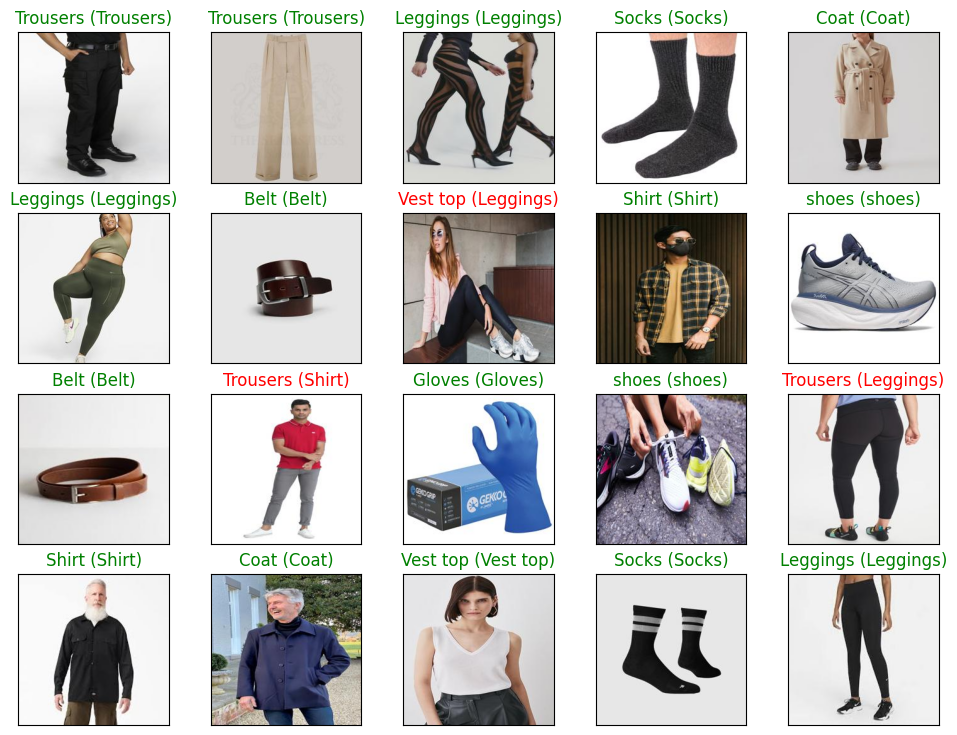

In [35]:
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               batch_size= 32,
                                               target_size= (240,240),
                                               class_mode = "categorical")

imgs, labels = test_data.next()
print(test_data.class_indices)

# 모델 예측 값 출력
probs = model.predict(imgs)
# 각 이미지에 대해 가장 높은 확률 값을 가진 클래스 찾기
preds = np.argmax(probs, axis=1)
# 예측 결과 출력
print('예측 결과 출력',preds)


with open('aaaa.txt', 'w', encoding = 'utf-8') as fl:
        fl.write(str(imgs))

classes = ['Belt', 'Coat', 'Gloves', 'Jacket', 'Leggings', 'Shirt', 'Socks', 'Trousers', 'Vest top', 'shoes']



# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(12, 9))

# display 20 images
for idx in range(20):
    ax = fig.add_subplot(4, 5, idx+1, xticks=[], yticks=[])
    plt.imshow(imgs[idx])
    ax.set_title("{} ({})".format(classes[preds[idx].item()], classes[int(list(labels[idx]).index(1))]),
                 color=("green" if preds[idx]==list(labels[idx]).index(1) else "red"))
plt.show()


In [95]:
# 모델 저장
model.save('my_model')


INFO:tensorflow:Assets written to: my_model\assets


INFO:tensorflow:Assets written to: my_model\assets
